In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load Data
In this section we are going to Load our Data into a dataframe and split it into test and train datasets

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
target = df['Loan_Status']
df.drop('Loan_Status', axis=1, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 12), (154, 12), (460,), (154,))

## Pre-Processing
In this section, we are going to clean our data, handle the missing values, convert categorical values into numbers and etc.

to have a better perspective on dataset, let's have a quic overview on our data

In [8]:
X_train['Loan_ID'].value_counts()

Loan_ID
LP001319    1
LP001504    1
LP001086    1
LP001106    1
LP001028    1
           ..
LP001788    1
LP001543    1
LP001112    1
LP001761    1
LP001350    1
Name: count, Length: 460, dtype: int64

As this feature is uniqe for every data, we cannot extract any usefull data from it and it will be removed from dataset

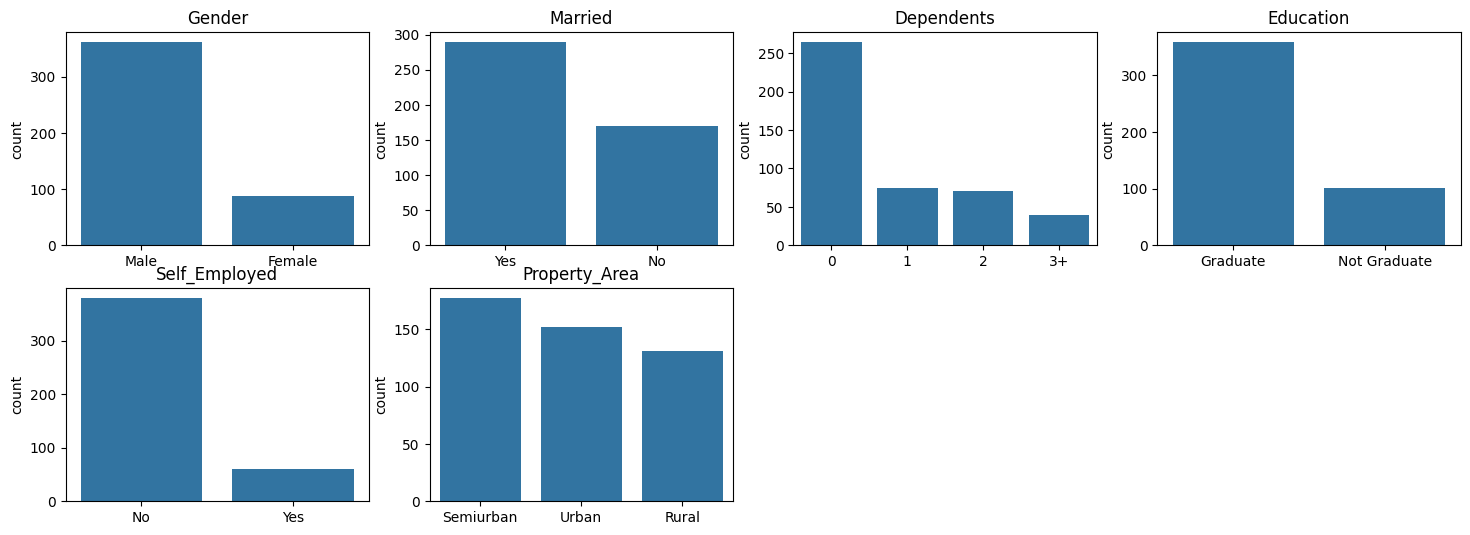

In [9]:
obj = (X_train.dtypes == 'object') 
object_cols = list(obj[obj].index) 
object_cols.remove('Loan_ID')
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
  y = X_train[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.title(col)
  sns.barplot(x=list(y.index), y=y) 
  index +=1
plt.show()

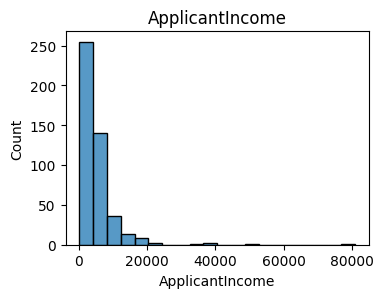

In [10]:
obj = (X_train.dtypes == 'int64') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
  plt.subplot(11,4,index) 
  plt.title(col)
  sns.histplot(X_train[col], bins=20) 
  index +=1
plt.show()

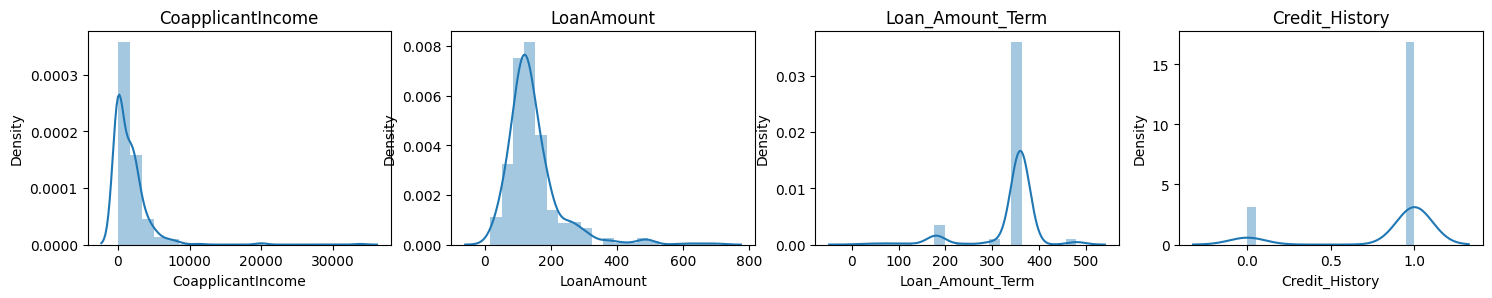

In [11]:
obj = (X_train.dtypes == 'float64') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
  y = X_train[col].value_counts()
  plt.subplot(11,4,index) 
  plt.title(col)
  sns.distplot(X_train[col], bins=20) 
  index +=1
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

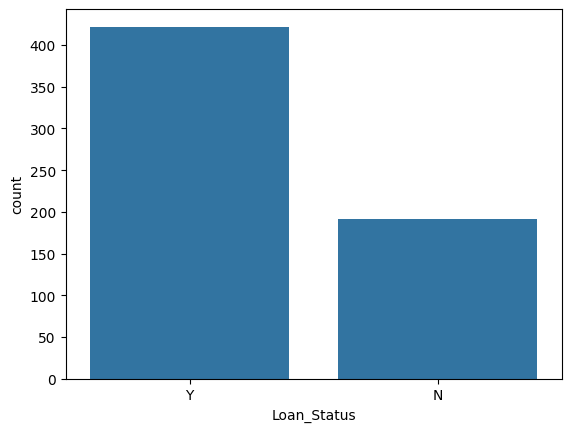

In [50]:
y = target.value_counts()
sns.barplot(x=y.index, y=y)

Now, we are going to Handle Missing values. First, let's see features with NaN and check their statistical data

In [71]:
X_train.isna().sum()

Loan_ID               0
Gender               11
Married               1
Dependents           11
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     11
Credit_History       36
Property_Area         0
dtype: int64

In [76]:
X_train['LoanAmount'].describe()

count    444.000000
mean     147.218468
std       85.716313
min       17.000000
25%      100.000000
50%      128.000000
75%      165.250000
max      700.000000
Name: LoanAmount, dtype: float64

In [77]:
X_train['Loan_Amount_Term'].describe()

count    449.000000
mean     339.100223
std       68.560787
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [78]:
X_train['Credit_History'].describe()

count    424.000000
mean       0.844340
std        0.362961
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

Now, we are going to fill data with 3 different methods. we will fill categorical data with mode, 'Loan_Amount_Term', 'Credit_History' with median and 'LoanAmount' with mean

In [12]:
fill_with_mode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
fill_with_median = ['Loan_Amount_Term', 'Credit_History']
fill_with_mean = ['LoanAmount']
for feature in fill_with_mode:
    fill_value = X_train[feature].mode()[0]
    X_train[feature] = X_train[feature].fillna(fill_value)
for feature in fill_with_median:
    fill_value = X_train[feature].median()
    X_train[feature] = X_train[feature].fillna(fill_value)
for feature in fill_with_mean:
    fill_value = X_train[feature].mean()
    X_train[feature] = X_train[feature].fillna(fill_value)
X_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In this step, we will Convert non-numerical Columns into numirecal values. 

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 92 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            460 non-null    object 
 1   Gender             460 non-null    object 
 2   Married            460 non-null    object 
 3   Dependents         460 non-null    object 
 4   Education          460 non-null    object 
 5   Self_Employed      460 non-null    object 
 6   ApplicantIncome    460 non-null    int64  
 7   CoapplicantIncome  460 non-null    float64
 8   LoanAmount         460 non-null    float64
 9   Loan_Amount_Term   460 non-null    float64
 10  Credit_History     460 non-null    float64
 11  Property_Area      460 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 46.7+ KB


In [14]:
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 92 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            460 non-null    int32  
 1   Gender             460 non-null    int32  
 2   Married            460 non-null    int32  
 3   Dependents         460 non-null    int32  
 4   Education          460 non-null    int32  
 5   Self_Employed      460 non-null    int32  
 6   ApplicantIncome    460 non-null    int64  
 7   CoapplicantIncome  460 non-null    float64
 8   LoanAmount         460 non-null    float64
 9   Loan_Amount_Term   460 non-null    float64
 10  Credit_History     460 non-null    float64
 11  Property_Area      460 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 34.1 KB


The type of our target is 'Object' and it should also convert into numerical

In [15]:
y_train = le.fit_transform(y_train)

Now, let's see the correlation matrix to decide if it is neccessary to remove any of features

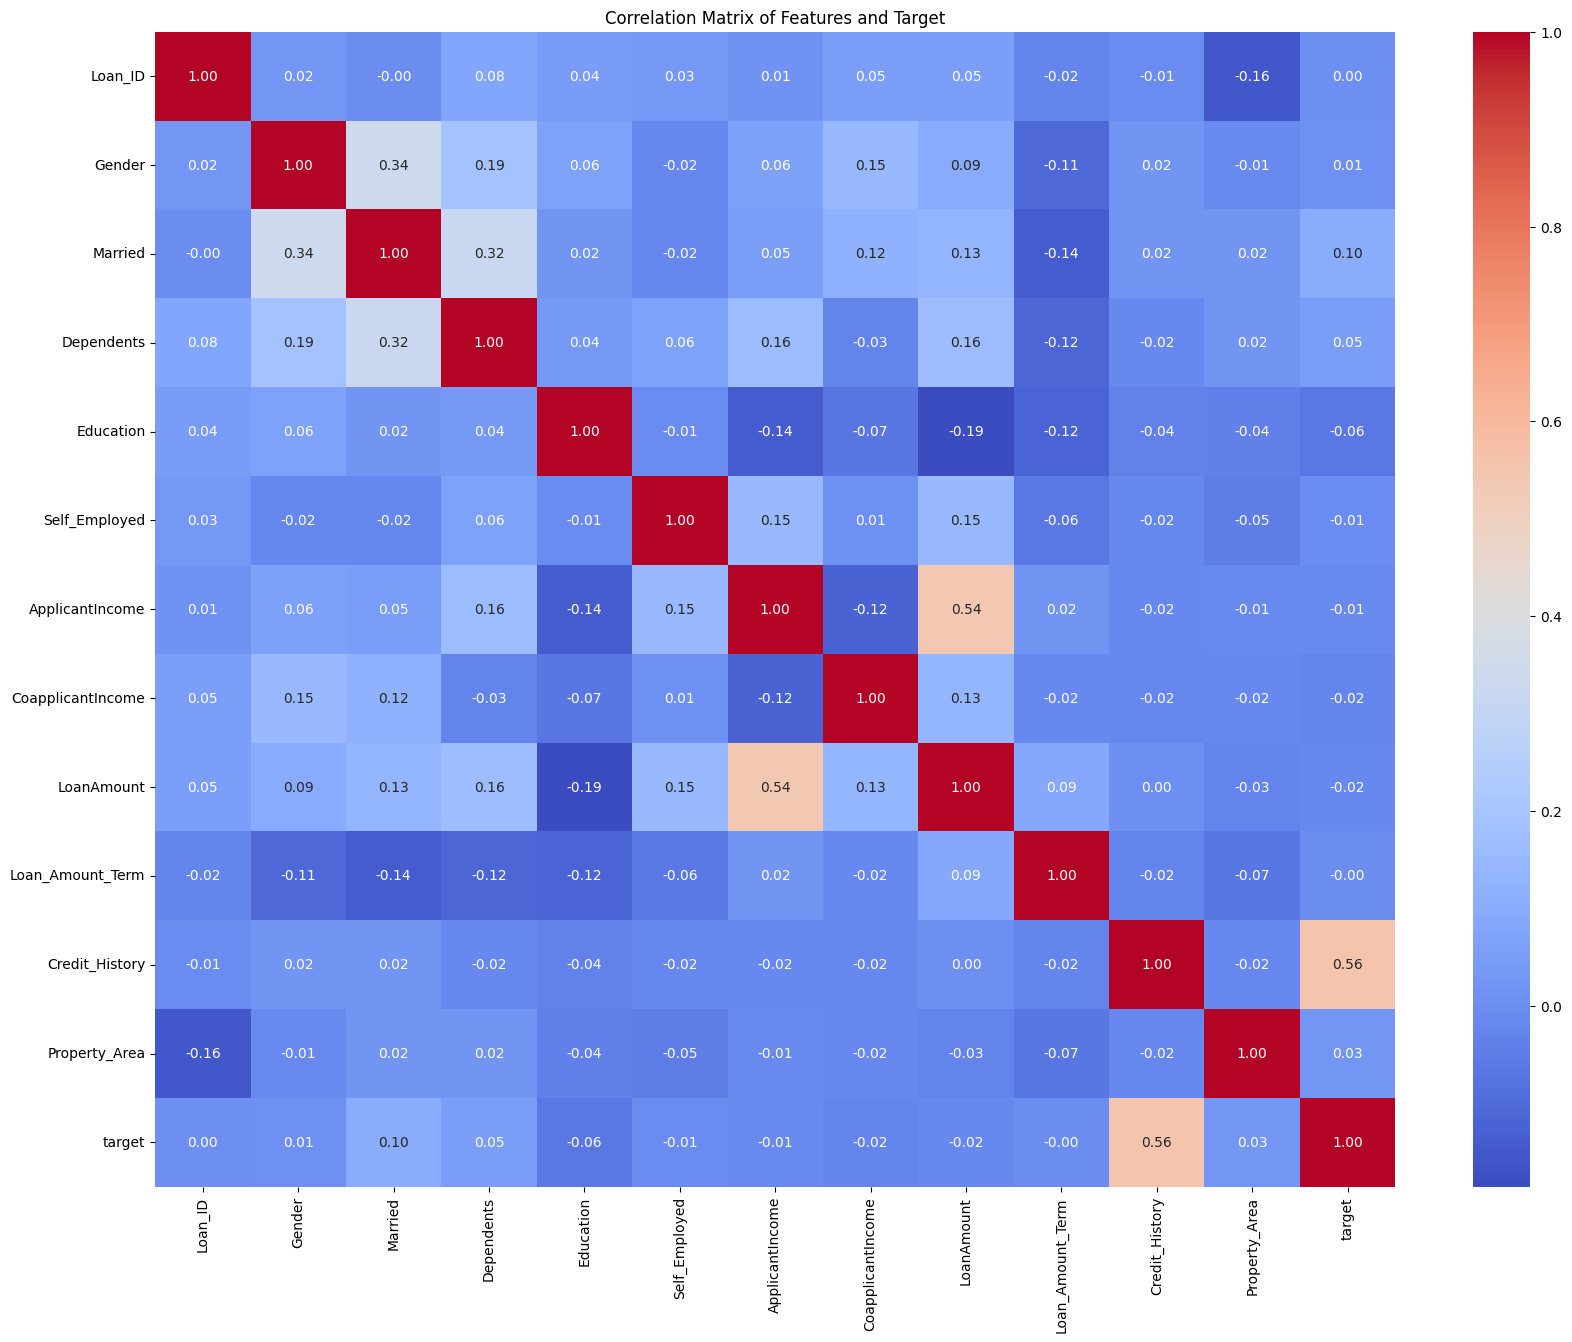

In [16]:
temp_df = X_train.copy()
temp_df['target'] = y_train
correlation_matrix = temp_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()

We will remove any feature wich have zero correlation with our target

In [17]:
correlation_target = correlation_matrix['target'].abs()
correlation_threshould = 0
selected_features = correlation_target[correlation_target>correlation_threshould].index.to_list()
selected_features.remove('target')
selected_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [18]:
X_train_selected = X_train[selected_features]

Also, we should scale our data and make it Standard

In [19]:
sc = StandardScaler()
X_train_selected = sc.fit_transform(X_train_selected)

## Select Model


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [22]:
def f1_printer(y_train, train_predict, y_val, val_predict, name):
    print(f"F1_score of train for {name}: ", f1_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print(f"F1_score of validation {name}: ", f1_score(y_true=y_val, y_pred=val_predict, average='weighted'))
def acc_printer(y_train, train_predict, y_val, val_predict, name):
    print(f"accuracy_score of train {name}: ", accuracy_score(y_true=y_train, y_pred=train_predict))
    print(f"accuracy_score of validation {name}: ", accuracy_score(y_true=y_val, y_pred=val_predict))
    

In [23]:
def heatmap(y_train, train_predict):
    cm = confusion_matrix(y_train,train_predict)

    sns.heatmap(cm , annot=True ,fmt='d')
    plt.xlabel("preficted Labels")
    plt.ylabel("True Lables")

In this section, we are going to train some models to find best fitting model for our data. but first, we are going to split our data into train and validation

In [24]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_selected, y_train, test_size=0.25, random_state=42)

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
sgdc = SGDClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
knc = KNeighborsClassifier(n_neighbors=4)
svc=SVC(random_state=42)
lsr=LogisticRegression(random_state=42)
lsr_cv = LogisticRegressionCV(random_state=42)
rfc = RandomForestClassifier(random_state=42)
xgbc = XGBClassifier()


In [26]:
for clf in (dtc, sgdc, adaboost, gbc, knc, svc, lsr, lsr_cv, rfc, xgbc):
    print(f"Training {clf.__class__.__name__}")
    clf.fit(X_tr, y_tr)
    train_predict = clf.predict(X_tr)
    val_predict = clf.predict(X_val)
    f1_printer(y_tr, train_predict, y_val, val_predict, clf.__class__.__name__)
    print(f"{30*'='}")

Training DecisionTreeClassifier
F1_score of train for DecisionTreeClassifier:  1.0
F1_score of validation DecisionTreeClassifier:  0.6811530976506338
Training SGDClassifier
F1_score of train for SGDClassifier:  0.735715425570498
F1_score of validation SGDClassifier:  0.6877579643358044
Training AdaBoostClassifier
F1_score of train for AdaBoostClassifier:  0.8792363225699803
F1_score of validation AdaBoostClassifier:  0.692352016762703
Training GradientBoostingClassifier
F1_score of train for GradientBoostingClassifier:  0.9491137303856206
F1_score of validation GradientBoostingClassifier:  0.6997913076538436
Training KNeighborsClassifier
F1_score of train for KNeighborsClassifier:  0.8621030448981543
F1_score of validation KNeighborsClassifier:  0.6841327723235157
Training SVC
F1_score of train for SVC:  0.8315504945939729
F1_score of validation SVC:  0.7463033460228412
Training LogisticRegression
F1_score of train for LogisticRegression:  0.8173558435134236
F1_score of validation Logi

In [27]:
for clf in (dtc, sgdc, adaboost, gbc, knc, svc, lsr, lsr_cv, rfc, xgbc):
    print(f"Training {clf.__class__.__name__}")
    clf.fit(X_tr, y_tr)
    train_predict = clf.predict(X_tr)
    val_predict = clf.predict(X_val)
    acc_printer(y_tr, train_predict, y_val, val_predict, clf.__class__.__name__)
    print(f"{30*'='}")

Training DecisionTreeClassifier
accuracy_score of train DecisionTreeClassifier:  1.0
accuracy_score of validation DecisionTreeClassifier:  0.6956521739130435
Training SGDClassifier
accuracy_score of train SGDClassifier:  0.7710144927536232
accuracy_score of validation SGDClassifier:  0.7217391304347827
Training AdaBoostClassifier
accuracy_score of train AdaBoostClassifier:  0.8869565217391304
accuracy_score of validation AdaBoostClassifier:  0.7217391304347827
Training GradientBoostingClassifier
accuracy_score of train GradientBoostingClassifier:  0.9507246376811594
accuracy_score of validation GradientBoostingClassifier:  0.7304347826086957
Training KNeighborsClassifier
accuracy_score of train KNeighborsClassifier:  0.863768115942029
accuracy_score of validation KNeighborsClassifier:  0.6956521739130435
Training SVC
accuracy_score of train SVC:  0.8492753623188406
accuracy_score of validation SVC:  0.7739130434782608
Training LogisticRegression
accuracy_score of train LogisticRegressi

So far, our best models have been 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LogisticRegression' and 'SVC'. We will try to tune their's params with GridSearch

In [97]:
tree_param = {'max_features':['sqrt', 'log2'], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 10, 30]}
rfc_result = GridSearchCV(rfc, tree_param, scoring='f1_weighted',cv=5)
rfc_result.fit(X_train, y_train)
rfc_result.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}

In [28]:
rfc = RandomForestClassifier(random_state=42, max_depth=30)
rfc.fit(X_tr, y_tr)
rfc_train_predict = rfc.predict(X_tr)
rfc_val_predict = rfc.predict(X_val)
f1_printer(y_tr, rfc_train_predict, y_val, rfc_val_predict, rfc.__class__.__name__)
acc_printer(y_tr, rfc_train_predict, y_val, rfc_val_predict, rfc.__class__.__name__)


F1_score of train for RandomForestClassifier:  1.0
F1_score of validation RandomForestClassifier:  0.7500360136196962
accuracy_score of train RandomForestClassifier:  1.0
accuracy_score of validation RandomForestClassifier:  0.7739130434782608


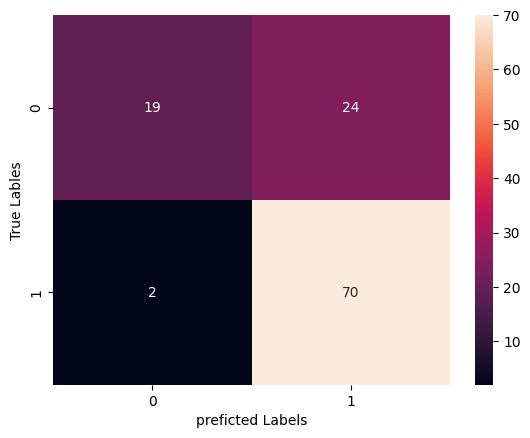

In [29]:
heatmap(y_val, rfc_val_predict)

In [100]:
tree_param = {'loss':['log_loss', 'exponential'], 'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [3, 10, 30],
              'learning_rate':[0.001, 0.01, 1, 10]}
gbc_result = GridSearchCV(gbc, tree_param, scoring='f1_weighted',cv=5)
gbc_result.fit(X_train, y_train)
gbc_result.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 3}

In [30]:
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.01, loss='exponential')
gbc.fit(X_tr, y_tr)
gbc_train_predict = gbc.predict(X_tr)
gbc_val_predict = gbc.predict(X_val)
f1_printer(y_tr, gbc_train_predict, y_val, gbc_val_predict, gbc.__class__.__name__)
acc_printer(y_tr, gbc_train_predict, y_val, gbc_val_predict, gbc.__class__.__name__)

F1_score of train for GradientBoostingClassifier:  0.8279773156899811
F1_score of validation GradientBoostingClassifier:  0.6973954883023604
accuracy_score of train GradientBoostingClassifier:  0.8492753623188406
accuracy_score of validation GradientBoostingClassifier:  0.7391304347826086


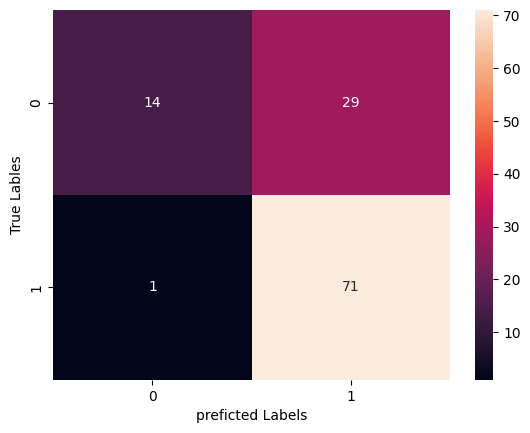

In [31]:
heatmap(y_val, gbc_val_predict)

In [179]:
tree_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
svc_result = GridSearchCV(svc, tree_param, scoring='f1_weighted',cv=5)
svc_result.fit(X_tr, y_tr)
svc_result.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [32]:
svc=SVC(random_state=42, kernel='linear', gamma='scale')
svc.fit(X_tr, y_tr)
svc_train_predict = svc.predict(X_tr)
svc_val_predict = svc.predict(X_val)
f1_printer(y_tr, svc_train_predict, y_val, svc_val_predict, svc.__class__.__name__)
acc_printer(y_tr, svc_train_predict, y_val, svc_val_predict, svc.__class__.__name__)

F1_score of train for SVC:  0.8173558435134236
F1_score of validation SVC:  0.7463033460228412
accuracy_score of train SVC:  0.8376811594202899
accuracy_score of validation SVC:  0.7739130434782608


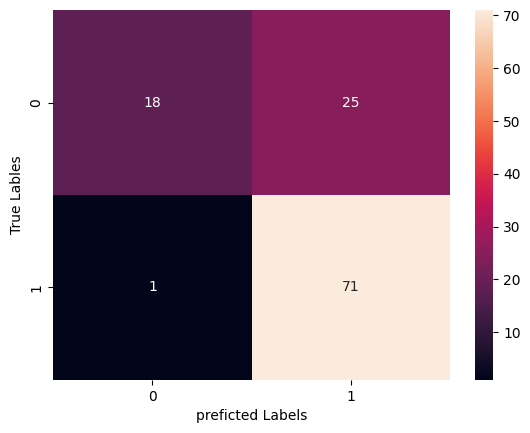

In [33]:
heatmap(y_val, svc_val_predict)

In [263]:
tree_param = {'penalty':['l1', 'l2', 'elasticnet'], 'C': [0.1, 1, 5]}
lsr_result = GridSearchCV(lsr, tree_param, scoring='f1_weighted',cv=5)
lsr_result.fit(X_tr, y_tr)
lsr_result.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [34]:
lsr=LogisticRegression(random_state=42, penalty='l2', C=0.1)
lsr.fit(X_tr, y_tr)
lsr_train_predict = lsr.predict(X_tr)
lsr_val_predict = lsr.predict(X_val)
f1_printer(y_tr, lsr_train_predict, y_val, lsr_val_predict, lsr.__class__.__name__)
acc_printer(y_tr, lsr_train_predict, y_val, lsr_val_predict, lsr.__class__.__name__)

F1_score of train for LogisticRegression:  0.8173558435134236
F1_score of validation LogisticRegression:  0.7463033460228412
accuracy_score of train LogisticRegression:  0.8376811594202899
accuracy_score of validation LogisticRegression:  0.7739130434782608


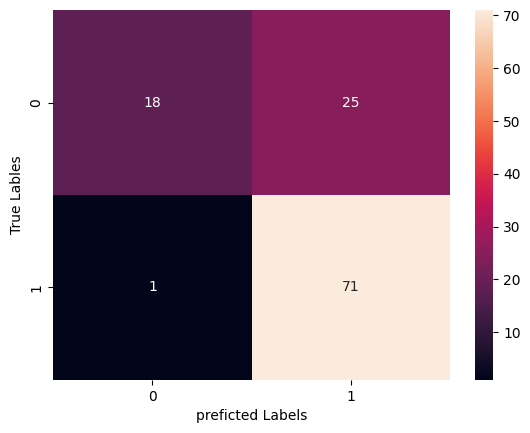

In [35]:
heatmap(y_val, lsr_val_predict)


In [276]:
tree_param = {'max_depth': [3, 10], 'eta': [0.01, 1, 2], 'alpha': [0.01, 0.1, 1]}
xgbc_result = GridSearchCV(xgbc, tree_param, scoring='f1_weighted',cv=5)
xgbc_result.fit(X_tr, y_tr)
xgbc_result.best_params_

{'alpha': 0.01, 'eta': 0.01, 'max_depth': 3}

In [36]:
xgbc=XGBClassifier()
xgbc.fit(X_tr, y_tr)
xgbc_train_predict = xgbc.predict(X_tr)
xgbc_val_predict = xgbc.predict(X_val)
f1_printer(y_tr, xgbc_train_predict, y_val, xgbc_val_predict, xgbc.__class__.__name__)
acc_printer(y_tr, xgbc_train_predict, y_val, xgbc_val_predict, xgbc.__class__.__name__)

F1_score of train for XGBClassifier:  1.0
F1_score of validation XGBClassifier:  0.7698991322834464
accuracy_score of train XGBClassifier:  1.0
accuracy_score of validation XGBClassifier:  0.782608695652174


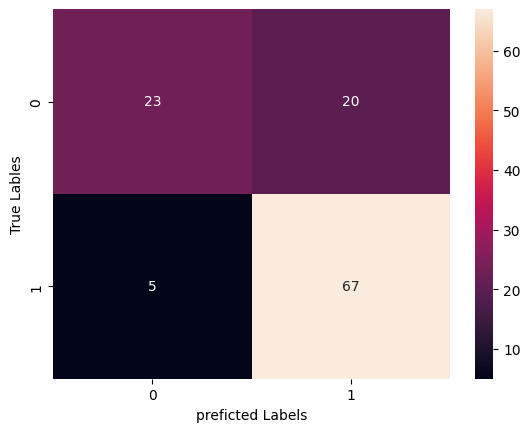

In [37]:
heatmap(y_val, xgbc_val_predict)

## Test our Model
Now, we will test our model on our test dataset. First, we are going to perform every steps of data cleaning on our train dataset

In [38]:
# Handling Missing Value
for feature in fill_with_mode:
    fill_value = X_test[feature].mode()[0]
    X_test[feature] = X_test[feature].fillna(fill_value)
for feature in fill_with_median:
    fill_value = X_test[feature].median()
    X_test[feature] = X_test[feature].fillna(fill_value)
for feature in fill_with_mean:
    fill_value = X_test[feature].mean()
    X_test[feature] = X_test[feature].fillna(fill_value)

# Convert non-numericals into numerical
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = le.fit_transform(X_test[col])

X_test_selected = X_test[selected_features]
X_test = sc.fit_transform(X_test)

y_test_le = le.fit_transform(y_test)


In [39]:
svc_test_predict = svc.predict(X_test_selected)
f1_printer(y_tr, svc_train_predict, y_test_le, svc_test_predict, svc.__class__.__name__)
f1_printer(y_tr, svc_train_predict, y_test_le, svc_test_predict, svc.__class__.__name__)

F1_score of train for SVC:  0.8173558435134236
F1_score of validation SVC:  0.5193661444447772
F1_score of train for SVC:  0.8173558435134236
F1_score of validation SVC:  0.5193661444447772


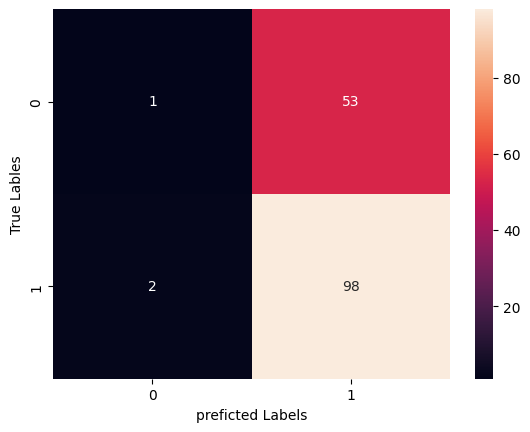

In [40]:
heatmap(y_test_le, svc_test_predict)

In [41]:
gbc_test_predict = gbc.predict(X_test_selected)
f1_printer(y_tr, gbc_train_predict, y_test_le, gbc_test_predict, gbc.__class__.__name__)
acc_printer(y_tr, gbc_train_predict, y_test_le, gbc_test_predict, gbc.__class__.__name__)

F1_score of train for GradientBoostingClassifier:  0.8279773156899811
F1_score of validation GradientBoostingClassifier:  0.5112997238981491
accuracy_score of train GradientBoostingClassifier:  0.8492753623188406
accuracy_score of validation GradientBoostingClassifier:  0.6493506493506493


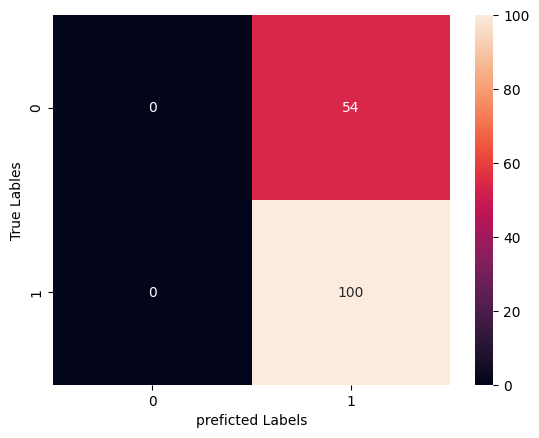

In [42]:
heatmap(y_test_le, gbc_test_predict)

In [43]:
lsr_test_predict = lsr.predict(X_test_selected)
f1_printer(y_tr, lsr_train_predict, y_test_le, lsr_test_predict, lsr.__class__.__name__)
f1_printer(y_tr, lsr_train_predict, y_test_le, lsr_test_predict, lsr.__class__.__name__)

F1_score of train for LogisticRegression:  0.8173558435134236
F1_score of validation LogisticRegression:  0.5234830743027464
F1_score of train for LogisticRegression:  0.8173558435134236
F1_score of validation LogisticRegression:  0.5234830743027464


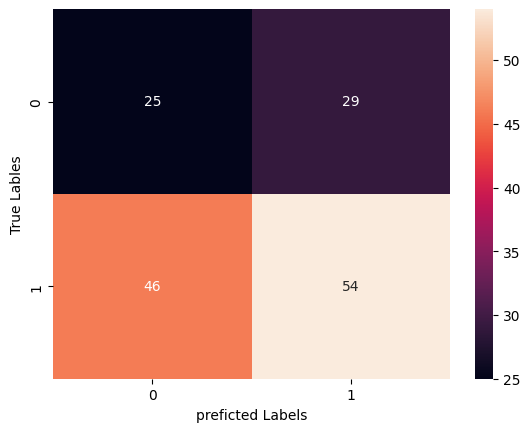

In [44]:
heatmap(y_test_le, lsr_test_predict)

In [45]:
rfc_test_predict = rfc.predict(X_test_selected)
f1_printer(y_tr, rfc_train_predict, y_test_le, rfc_test_predict, rfc.__class__.__name__)
acc_printer(y_tr, rfc_train_predict, y_test_le, rfc_test_predict, rfc.__class__.__name__)

F1_score of train for RandomForestClassifier:  1.0
F1_score of validation RandomForestClassifier:  0.5340883828278786
accuracy_score of train RandomForestClassifier:  1.0
accuracy_score of validation RandomForestClassifier:  0.525974025974026


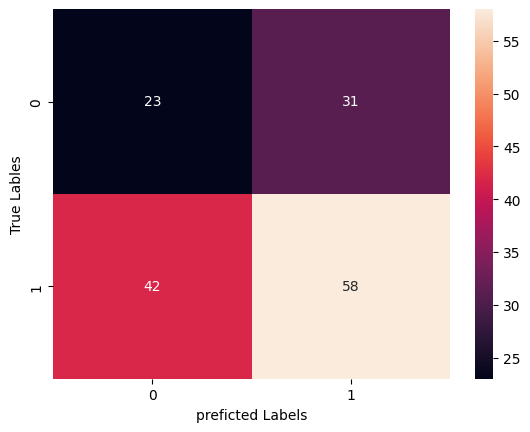

In [46]:
heatmap(y_test_le, rfc_test_predict)

In [47]:
xgbc_test_predict = xgbc.predict(X_test_selected)
f1_printer(y_tr, xgbc_train_predict, y_test_le, xgbc_test_predict, xgbc.__class__.__name__)
acc_printer(y_tr, xgbc_train_predict, y_test_le, xgbc_test_predict, xgbc.__class__.__name__)

F1_score of train for XGBClassifier:  1.0
F1_score of validation XGBClassifier:  0.7422274695001967
accuracy_score of train XGBClassifier:  1.0
accuracy_score of validation XGBClassifier:  0.7727272727272727


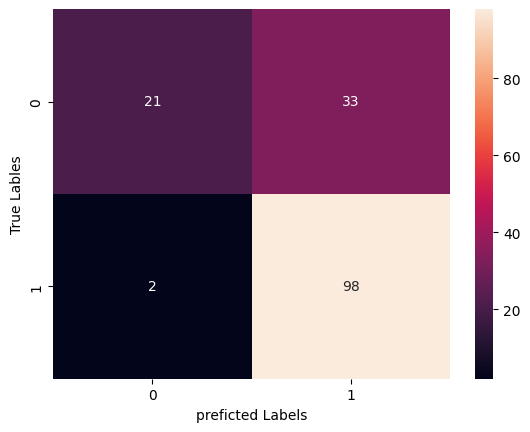

In [48]:
heatmap(y_test_le, xgbc_test_predict)

It seems like XGBClassifier is our best algorithm for predicting this dataset. Our output shows that this dataset may face with overfitting. But it's high f1-score and accuracy shows that it may not be overfitted. 

In a nutshil, our selected algorithm has the F1-score of 100 percent over train dataset, 76 percent over validation dataset and 74 percent over test dataset.
I believe that if our data was reacher and we had more data for learning, our test results would be higher than this.
